### Lets see what the hidden layers outputs look like for a simple NN solving the XOR problem



In [7]:
#Imports 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Lets make our mode:

In [8]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h = self.sigmoid(self.hidden(x))
        o = self.sigmoid(self.output(h))
        return o, h #we also return the h so that we can then look at the hidden layer outputs

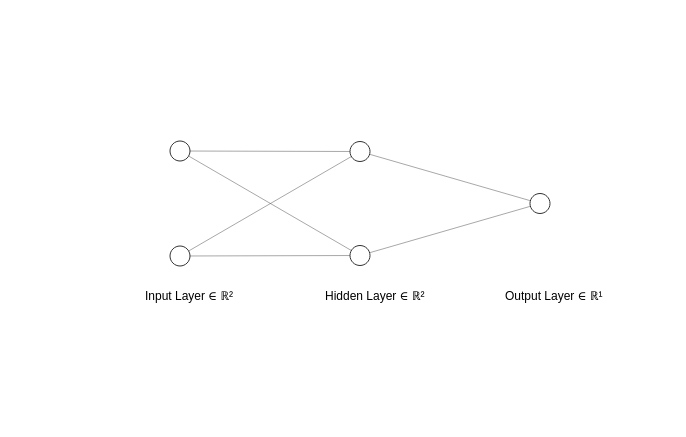

In [9]:
# initalize the network
model = XORNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Lets make our data:

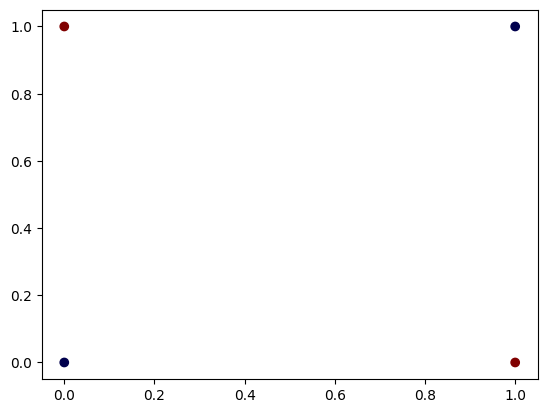

In [10]:
# Original points in XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)
plt.scatter(X[:,0],X[:,1], c=Y, cmap='seismic') #plot the x and y of each point in X. Color coresponds with the y value(label): 0 or 1 (not to be confused with the x and y in the graph)


Now let's generate some more points around each of the 4 points

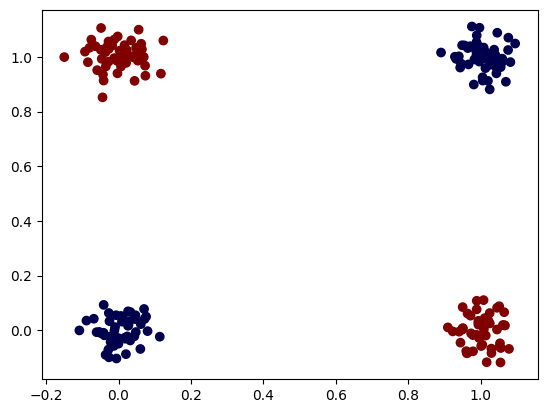

In [11]:
num_points_per_cluster = 50

# Noise to add around each point
noise_scale = 0.05

#Expand both lists to be: num_points_per_cluster * 4
X = X.repeat(num_points_per_cluster, 1)
Y = Y.repeat(num_points_per_cluster, 1)

# Now lets add the noise to each point
noise = torch.randn(X.shape) * noise_scale #creates an array of random noise values with the same size as the X matrix
X = X + noise #add the noise to each point


plt.scatter(X[:,0],X[:,1], c=Y, cmap='seismic')

Now its time to Train!!

In [12]:
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()
    pred, _ = model(X)
    loss = criterion(pred, Y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5000/50000], Loss: 0.2336
Epoch [10000/50000], Loss: 0.0399
Epoch [15000/50000], Loss: 0.0069
Epoch [20000/50000], Loss: 0.0034
Epoch [25000/50000], Loss: 0.0022
Epoch [30000/50000], Loss: 0.0016
Epoch [35000/50000], Loss: 0.0013
Epoch [40000/50000], Loss: 0.0010
Epoch [45000/50000], Loss: 0.0009
Epoch [50000/50000], Loss: 0.0008


Now lets vizualize what our network looks like.

In [19]:
#define the domain for the function
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

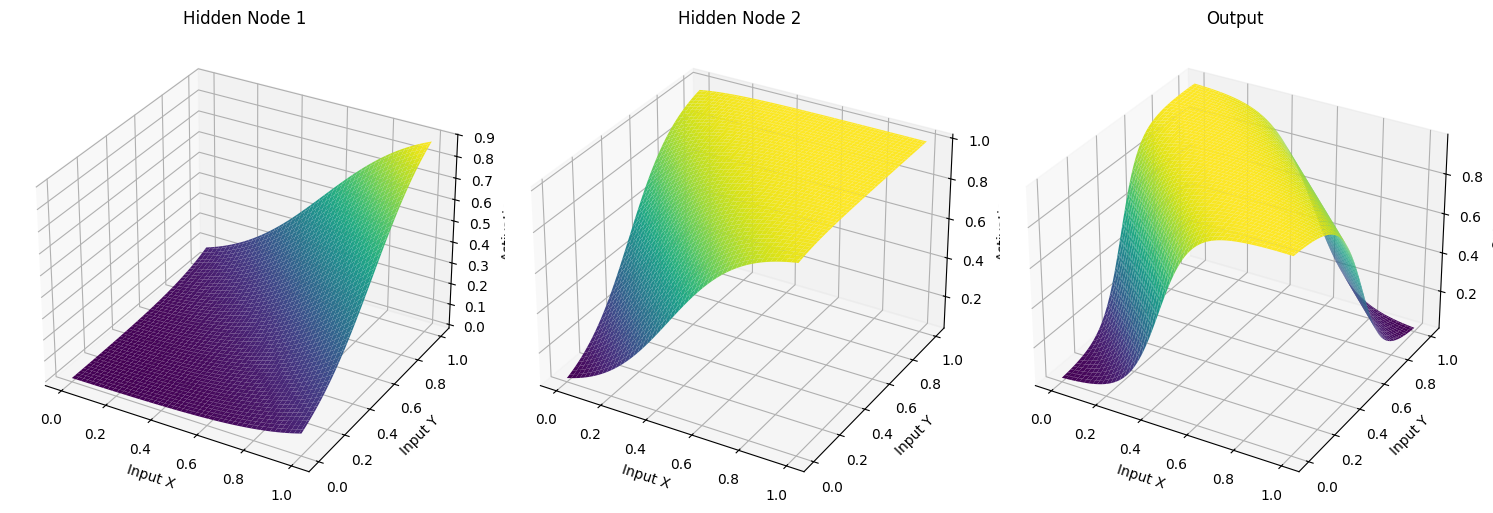

In [14]:
# lets get the output and hidden layer activations for each point
with torch.no_grad():
    output, hidden = model(xy_grid)


output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)

# plot
fig = plt.figure(figsize=(15, 5))

# output of the first hidden node
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden1.numpy(), cmap='viridis')
ax1.set_title('Hidden Node 1')
ax1.set_xlabel('Input X')
ax1.set_ylabel('Input Y')
ax1.set_zlabel('Activation')

# output of the second hidden node 
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x_grid.numpy(), y_grid.numpy(), hidden2.numpy(), cmap='viridis')
ax2.set_title('Hidden Node 2')
ax2.set_xlabel('Input X')
ax2.set_ylabel('Input Y')
ax2.set_zlabel('Activation')

# output for the whole model
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x_grid.numpy(), y_grid.numpy(), output.numpy(), cmap='viridis')
ax3.set_title('Output')
ax3.set_xlabel('Input X')
ax3.set_ylabel('Input Y')
ax3.set_zlabel('Output')

plt.tight_layout()
plt.show()

____

## Output of 2 Hidden Neurons


Earlier, we compared the input values to the final output, as well as to the hidden node outputs. Now, in the next section, we will examine the relationship between the hidden node outputs.

In [15]:
# lets get the output and hidden layer activations for each point
with torch.no_grad():
    output, hidden = model(X)

print(output.shape)
# output = output.reshape(100, 100)
hidden1 = hidden[:, 0]#.reshape(100, 100)
hidden2 = hidden[:, 1]#.reshape(100, 100)


print(hidden1.shape)

x_grid, y_grid = torch.meshgrid(hidden1, hidden2)

torch.Size([200, 1])
torch.Size([200])


This is what the data coming out of our input nodes looks like. This is just input data

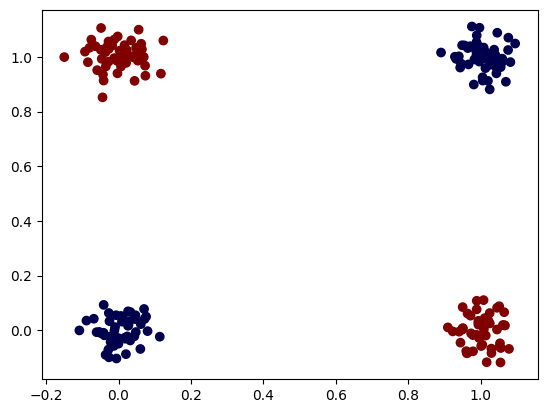

In [20]:
plt.scatter(X[:,0],X[:,1], c=Y, cmap='seismic')



The equations for the two hidden neurons are:

- $h_1 = \sigma(x_1 \cdot w_1 + x_2 \cdot w_2 + b_1)$
- $h_2 = \sigma(x_1 \cdot w_3 + x_2 \cdot w_4 + b_2)$

We now plot $h_1$ on one axis and $h_2$ on the other. This allows us to visualize how the network has transformed the input space.

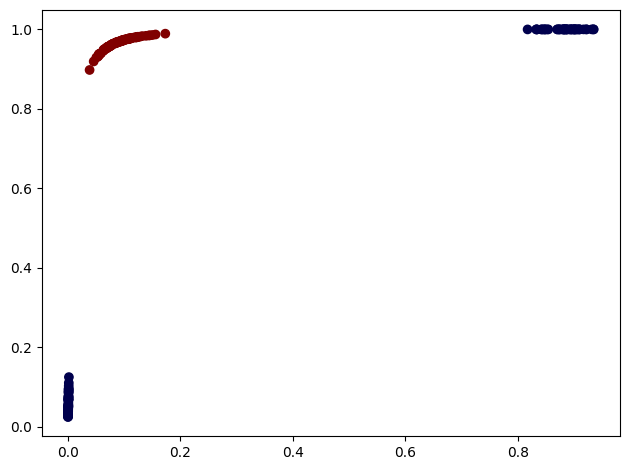

In [22]:
plt.scatter(hidden1, hidden2, c=Y, cmap='seismic')
plt.tight_layout()
plt.show()


You can see that through the linear transformation and activation functions, the network has "folded" the space, similar to the sketch below.

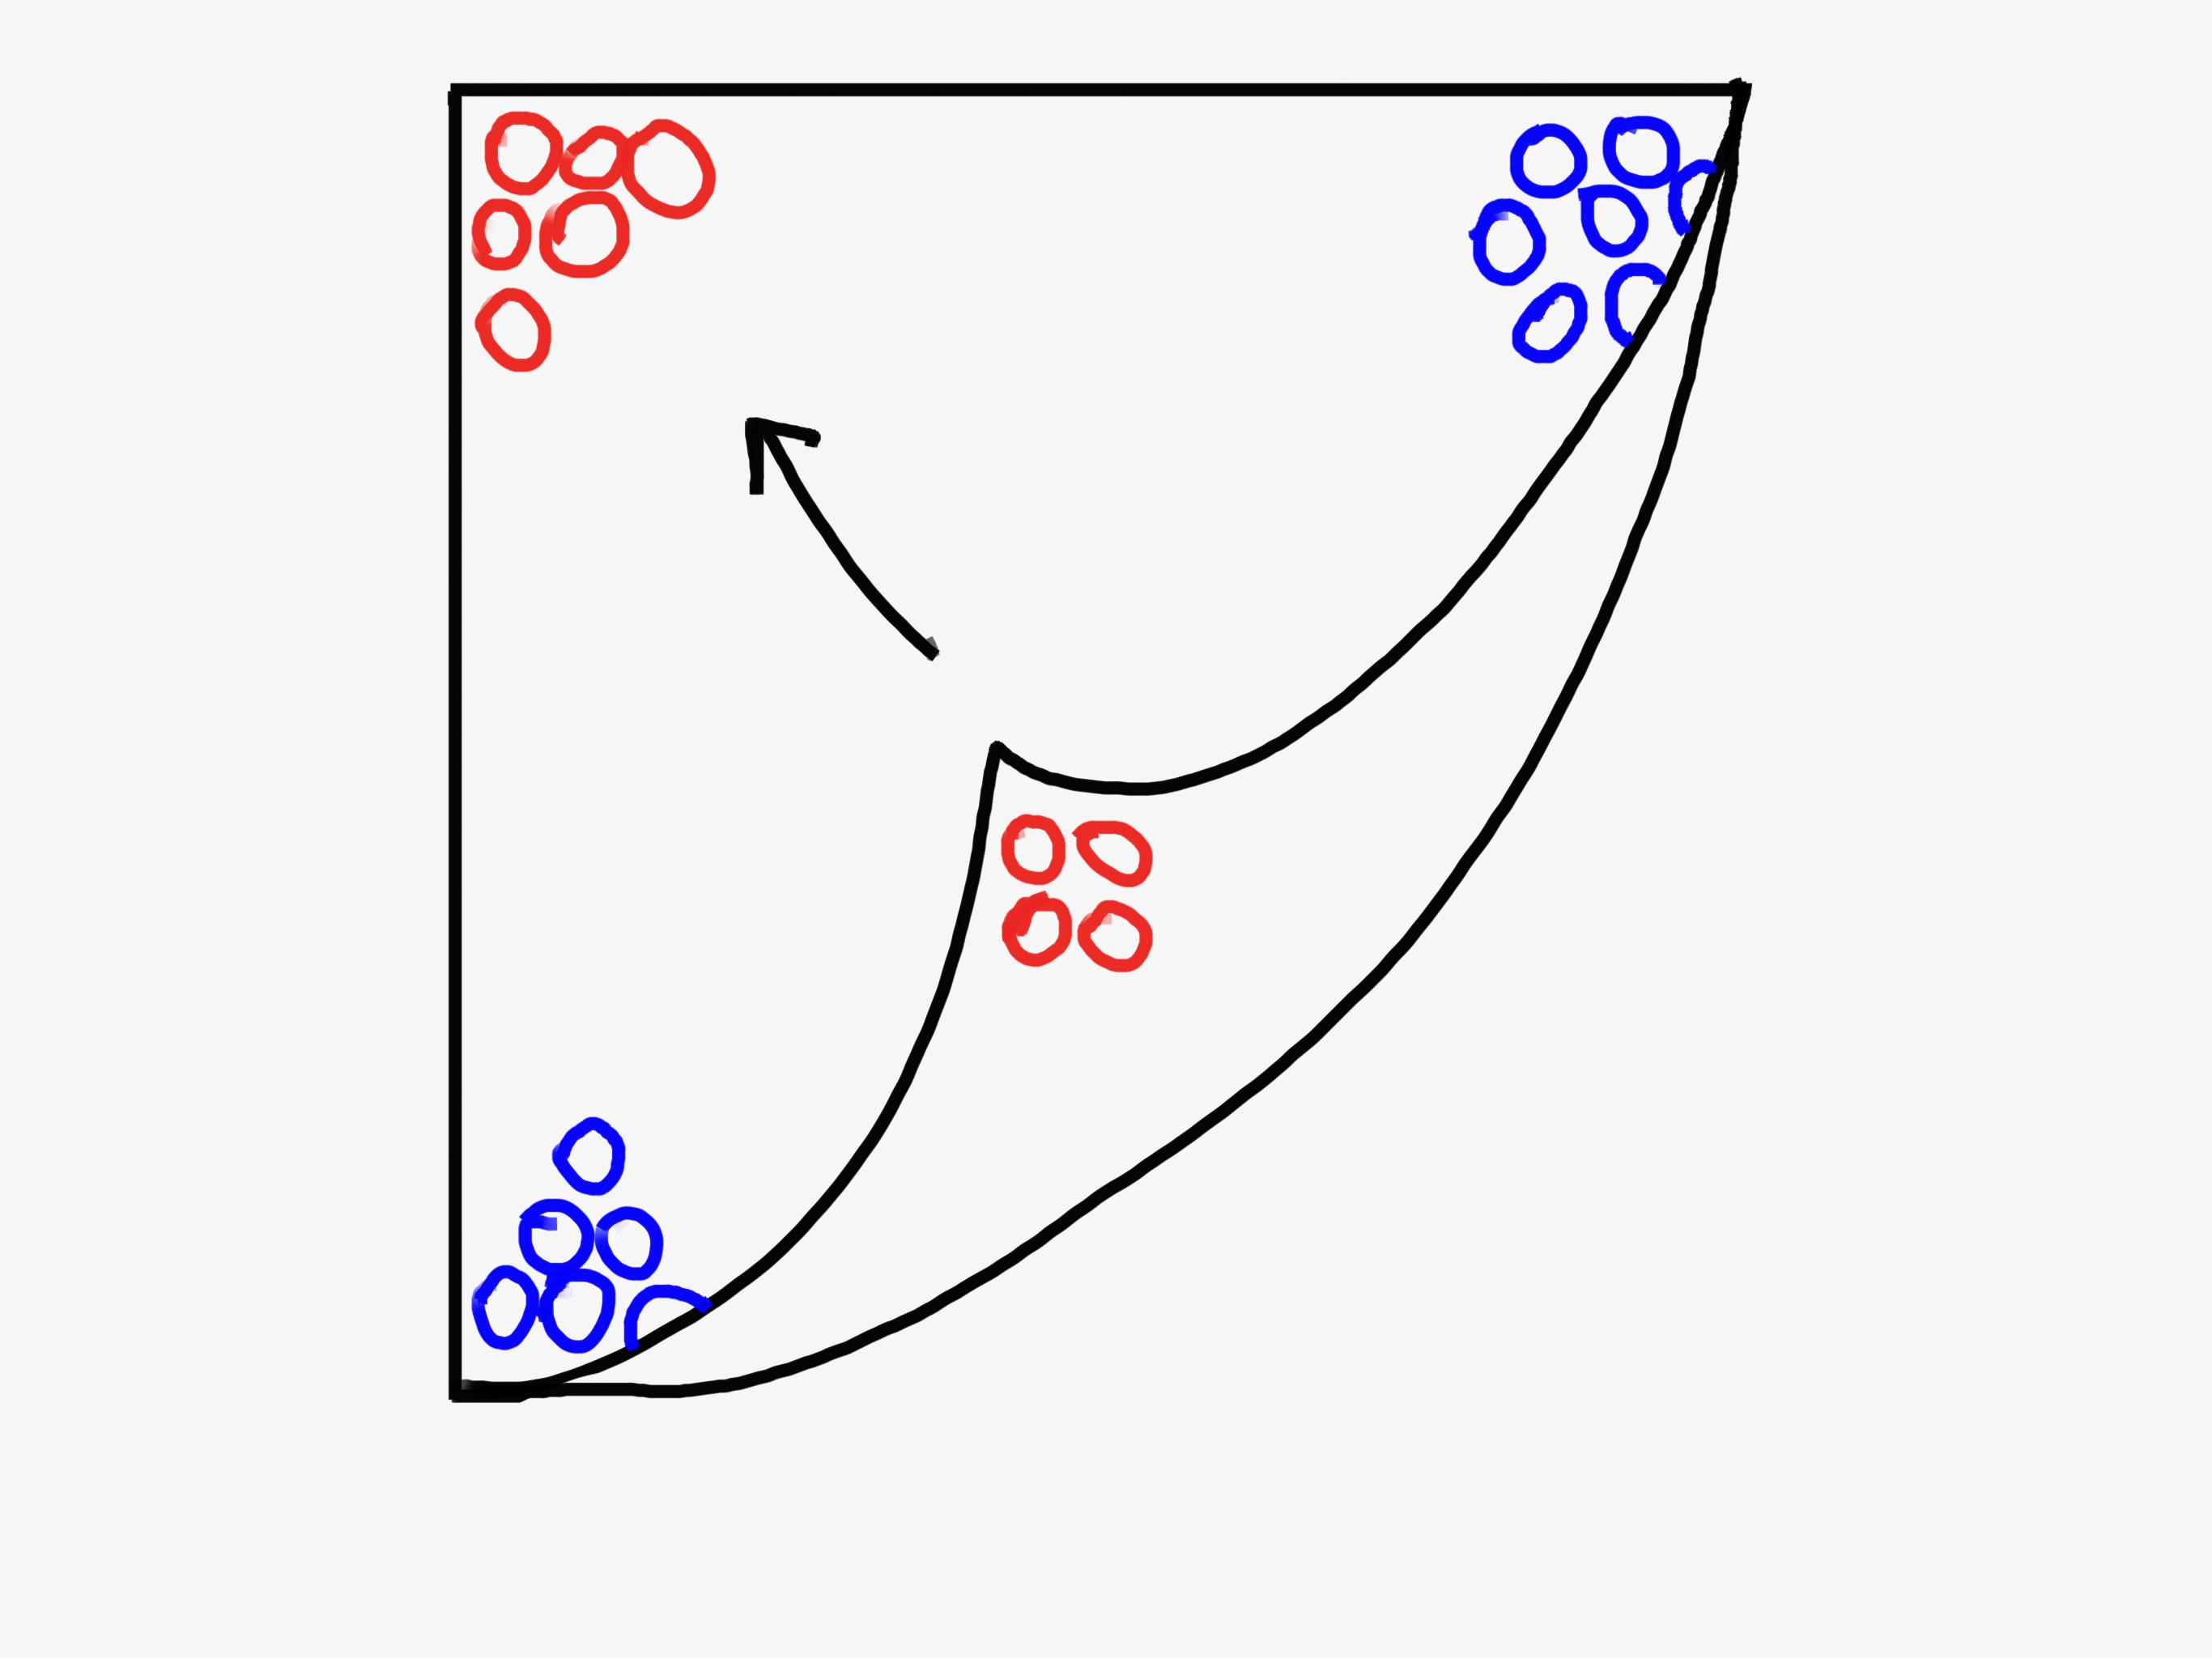